In [117]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
url = "https://worldpopulationreview.com/state-rankings/starbucks-stores-by-state"
response = requests.get(url)
content = response.text
soup = BeautifulSoup(content, 'html.parser')

table = soup.find_all('table')[0]

rows = table.find_all('tr')
state =[]
starbucks23 =[]
starbucks21= []
starbucks24 =[]
for row in rows[1:]:
    header = row.find_all('th')
    cells = row.find_all('td')
    state.append(header[0].text.strip())
    starbucks23.append(cells[0].text.strip() if cells[0].text.strip() else None)
    starbucks21.append(cells[1].text.strip() if cells[1].text.strip() else None)
    starbucks24.append(cells[2].text.strip() if cells[2].text.strip() else None)


df = pd.DataFrame({
    'State' : state,
    'Starbucks2021': starbucks21,
    'Starbucks2023': starbucks23,
    'Starbucks2024': starbucks24,
})

ChatGPT was used for debugging for the following cell.

In [120]:
url = "https://worldpopulationreview.com/state-rankings/dunkin-donuts-by-state"
response = requests.get(url)
content = response.text
soup = BeautifulSoup(content, 'html.parser')

table = soup.find_all('table')[0]

rows = table.find_all('tr')
state =[]
dunkin23 =[]
dunkin24 =[]
for row in rows[1:]:
    header = row.find_all('th')
    cells = row.find_all('td')
    state.append(header[0].text.strip())
    dunkin24.append(int(cells[0].text.strip().replace(',', '') if cells[0].text.strip() else 0))
    dunkin23.append(int(cells[1].text.strip().replace(',', '') if cells[1].text.strip() else 0))
    

df2 = pd.DataFrame({
    'State' : state,
    'Dunkin2023': dunkin23,
    'Dunkin2024': dunkin24,
})

In [121]:
coffee = pd.merge(df, df2, on='State', how='outer')
coffee

,State,Starbucks2021,Starbucks2023,Starbucks2024,Dunkin2023,Dunkin2024
0,Alabama,99,85,None,59,69
1,Alaska,49,49,None,0,0
2,Arizona,535,548,579,102,110
3,Arkansas,66,55,None,9,14
4,California,"2,959","3,080","3,117",134,143
5,Colorado,497,495,506,43,48
6,Connecticut,125,123,None,480,476
7,Delaware,39,25,None,66,67
8,District of Columbia,None,91,None,0,19
9,Florida,786,844,892,883,909


ChatGPT was used to understand how to use melt function in this scenerio.

In [122]:
tidy= coffee.melt(
    id_vars=['State'], 
    value_vars=['Starbucks2021', 'Starbucks2023', 'Starbucks2024', 'Dunkin2023', 'Dunkin2024'],
    var_name='Company_Year', 
    value_name='NumberOfStore'
)

# Separate "Company" and "Year" by splitting the 'Company_Year' column
tidy['Company'] = tidy['Company_Year'].str.extract(r'([A-Za-z]+)')
tidy['Year'] = tidy['Company_Year'].str.extract(r'(\d{4})')

# Drop the original 'Company_Year' column
tidy = tidy.drop(columns='Company_Year')

tidy

,State,NumberOfStore,Company,Year
0,Alabama,99,Starbucks,2021
1,Alaska,49,Starbucks,2021
2,Arizona,535,Starbucks,2021
3,Arkansas,66,Starbucks,2021
4,California,"2,959",Starbucks,2021
...,...,...,...,...
250,Virginia,244,Dunkin,2024
251,Washington,0,Dunkin,2024
252,West Virginia,31,Dunkin,2024
253,Wisconsin,100,Dunkin,2024


In [123]:
url = "https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population"
response = requests.get(url)
content = response.text
soup = BeautifulSoup(content, 'html.parser')

table = soup.find_all('table')[0]

rows = table.find_all('tr')
state =[]
population =[]

for row in rows[1:]:
    header = row.find_all('th')
    cells = row.find_all('td')
    state.append(cells[2].text.strip())
    population.append(int(cells[3].text.strip().replace(',', '')))
    

pop = pd.DataFrame({
    'State' : state,
    'Population': population,
})


In [124]:
combined = pd.merge(tidy, pop, on='State', how='inner')

ChatGPT was used get the mapping values

In [125]:
# Mapping full state names to regions
region_mapping = {
    'Northeast': [
        'Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 
        'Rhode Island', 'Connecticut', 'New York', 'New Jersey', 'Pennsylvania'
    ],
    'Midwest': [
        'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 
        'Minnesota', 'Iowa', 'Missouri', 'Wisconsin', 
        'Illinois', 'Indiana', 'Michigan', 'Ohio'
    ],
    'South': [
        'Maryland', 'Delaware', 'Virginia', 'West Virginia', 
        'Kentucky', 'Tennessee', 'North Carolina', 'South Carolina', 
        'Georgia', 'Florida', 'Alabama', 'Mississippi', 
        'Louisiana', 'Arkansas', 'Oklahoma', 'Texas'
    ],
    'West': [
        'Montana', 'Idaho', 'Wyoming', 'Colorado', 
        'New Mexico', 'Utah', 'Arizona', 'Nevada', 
        'Washington', 'Oregon', 'California', 'Hawaii', 'Alaska'
    ]
}
def getRegion(state):
    for region, states in region_mapping.items():
        if state in states:
            return region

combined['Region'] = combined['State'].apply(getRegion)


In [126]:
combined.dropna(inplace=True)

In [127]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 0 to 254
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          210 non-null    object
 1   NumberOfStore  210 non-null    object
 2   Company        210 non-null    object
 3   Year           210 non-null    object
 4   Population     210 non-null    int64 
 5   Region         210 non-null    object
dtypes: int64(1), object(5)
memory usage: 11.5+ KB


In [129]:
revenue_data = {
    'Company': ['Starbucks', 'Starbucks', 'Starbucks', 'Dunkin', 'Dunkin'],
    'Year': ['2021', '2023', '2024', '2024', '2023'],
    'Revenue': [29.06, 35.97, 36.20, 1.37, 1.4]
}
revenue_df = pd.DataFrame(revenue_data)

# Merge df_melted with revenue_df
finalDataset = pd.merge(combined, revenue_df, on=['Company', 'Year'], how='left')

In [130]:
finalDataset

,State,NumberOfStore,Company,Year,Population,Region,Revenue
0,Alabama,99,Starbucks,2021,5024279,South,29.06
1,Alaska,49,Starbucks,2021,733391,West,29.06
2,Arizona,535,Starbucks,2021,7151502,West,29.06
3,Arkansas,66,Starbucks,2021,3011524,South,29.06
4,California,"2,959",Starbucks,2021,39538223,West,29.06
...,...,...,...,...,...,...,...
205,Virginia,244,Dunkin,2024,8631393,South,1.37
206,Washington,0,Dunkin,2024,7705281,West,1.37
207,West Virginia,31,Dunkin,2024,1793716,South,1.37
208,Wisconsin,100,Dunkin,2024,5893718,Midwest,1.37


In [131]:
finalDataset['NumberOfStore'] = finalDataset['NumberOfStore'].fillna('0').astype(str).str.replace(',','').astype(int)

In [132]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          210 non-null    object 
 1   NumberOfStore  210 non-null    int64  
 2   Company        210 non-null    object 
 3   Year           210 non-null    object 
 4   Population     210 non-null    int64  
 5   Region         210 non-null    object 
 6   Revenue        210 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.6+ KB


In [133]:
from plotnine import ggplot, aes, geom_bar, geom_point, geom_line, labs, theme_minimal, facet_wrap, scale_y_log10, theme

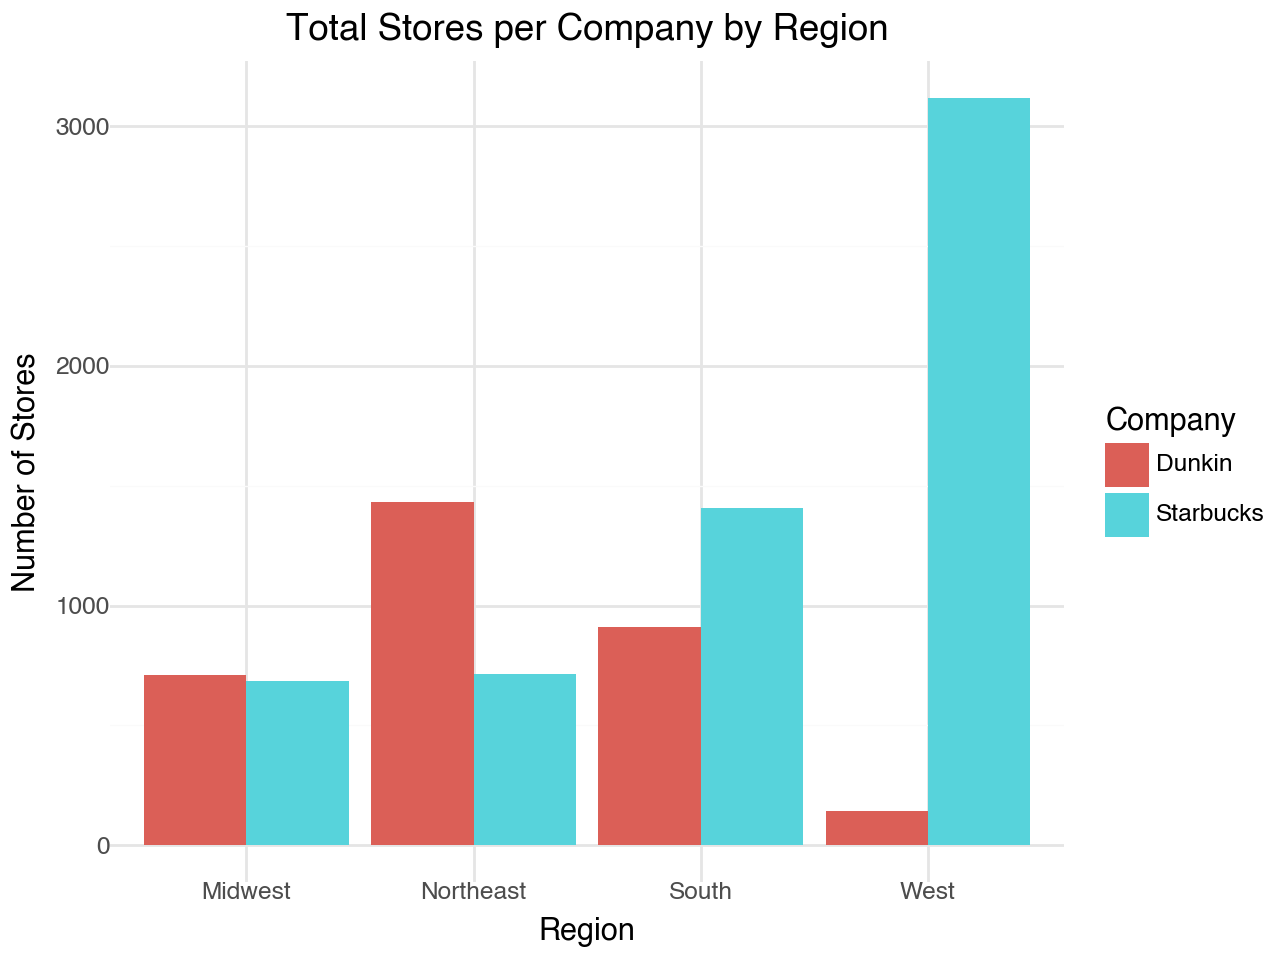

In [134]:
#Visualizing the total number of stores of the compnies according to regions
(
    ggplot(finalDataset, aes(x='Region', y='NumberOfStore', fill='Company')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Total Stores per Company by Region', x='Region', y='Number of Stores') +
    theme_minimal()
)


### Starbucks is more dominent in Western states.

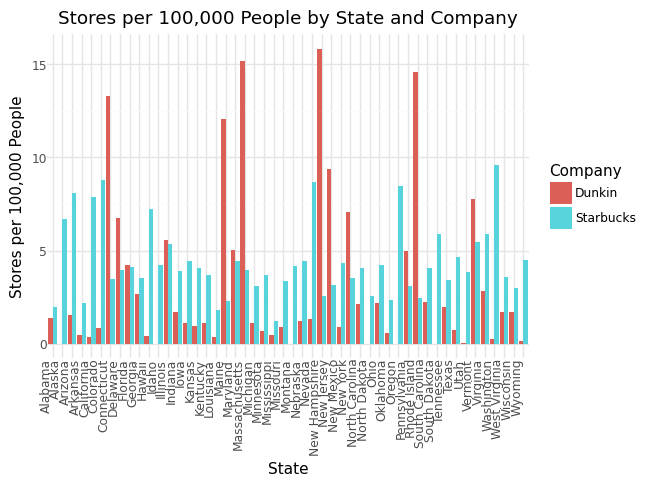

In [136]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, geom_point, labs, theme_minimal, theme, element_text, facet_wrap, geom_text

# Calculate stores per 100,000 people
finalDataset['Stores_per_100k'] = (finalDataset['NumberOfStore'] / finalDataset['Population']) * 100000

# Bar Plot: Stores per capita by state and company
bar_plot = (
    ggplot(finalDataset, aes(x='State', y='Stores_per_100k', fill='Company')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Stores per 100,000 People by State and Company', 
         x='State', 
         y='Stores per 100,000 People') +
    theme_minimal() +
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)



# Display the plots
bar_plot.draw()



### Starbucks have somewhat similar number of stores while Dunkin has a lot more stores in specific states.

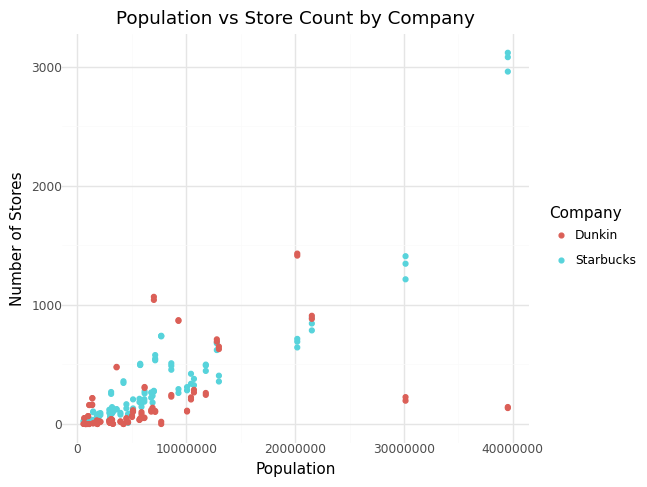

In [141]:
# Scatter Plot: Population vs Store count by company and region
scatter_plot = (
    ggplot(finalDataset, aes(x='Population', y='NumberOfStore', color='Company')) +
    geom_point() +
    labs(title='Population vs Store Count by Company', 
         x='Population', 
         y='Number of Stores') +
    theme_minimal()
)
scatter_plot.draw()

### We can se there are more Starbucks store per population than Dunkin and as the population increases the disparity increases.

ChatGPT was used to debug the following code

In [142]:
def getData(url):
    response = requests.get(url)
    content = response.text
    soup = BeautifulSoup(content, 'html.parser')
    
    company = url.split('/')[-1].split('-')[0]  # "starbucks"
    print(company)

    # Extract the first table
    table = soup.find_all('table')[0]
    rows = table.find_all('tr')
    
    # Initialize lists
    state = []
    years = []
    data_by_year = {}
    
    # Get header row and determine years
    headers = rows[0].find_all('th')
    years = [header.text.strip() for header in headers[1:]]  # Assume the first column is 'State'
    
    for year in years:
        data_by_year[year] = []
        
    # Process each row in the table
    for row in rows[1:]:  # Skip the header row
        header = row.find_all('th')
        cells = row.find_all('td')
        
        state.append(header[0].text.strip())
        
        for i, year in enumerate(years):
            # Replace commas and handle empty cells
            data_by_year[year].append(cells[i].text.strip().replace(',', '') if cells[i].text.strip() else 0)
            
    # Prepare data for DataFrame
    data = {'State': state}
    for year in years:
        data[year] = data_by_year[year]
    
    # Create DataFrame
        df = pd.DataFrame(data)
    def tidy_coffee_data(df):
        # Melt the DataFrame to create a tidy format
        tidy = df.melt(
            id_vars=['State'], 
            var_name='Company_Year', 
            value_name='NumberOfStore'
        )
        
        # Separate "Company" and "Year" by splitting the 'Company_Year' column
        tidy['Company'] = tidy['Company_Year'].str.extract(r'([A-Za-z]+)')
        tidy['Year'] = tidy['Company_Year'].str.extract(r'(\d{4})')
        
        # Drop the original 'Company_Year' column
        tidy = tidy.drop(columns='Company_Year')
        
        return tidy
    return tidy_coffee_data(df)

In [143]:
# as the table is not exact the like the starbucks or dunkin it shows differnt values
getData("https://worldpopulationreview.com/country-rankings/most-mcdonalds-by-country")

most


,State,NumberOfStore,Company,Year
0,United States,15000,of,2024
1,Japan,5000,of,2024
2,China,4500,of,2024
3,France,2200,of,2024
4,Brazil,1800,of,2024
...,...,...,...,...
451,Monaco,0,Date,NaN
452,Russia,May 16 2022,Date,NaN
453,Kazakhstan,January 5 2023,Date,NaN
454,Belarus,November 27 2022,Date,NaN
